In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# %cd gdrive/My\ Drive/Thesis/yasho #a/djust file path accordingly in your drive

In [ ]:
# %cd gdrive/My\ Drive/Thesis/yasho
# %ls

In [ ]:
# %tensorflow_version 2.x

In [ ]:
# !pip install classification-models-3D
# !pip install efficientnet-3D
# !pip install segmentation-models-3D

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv3D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)    
    x = Activation("relu")(x)

    x = Conv3D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  
    x = Activation("relu")(x)

    return x

#Encoder Block
def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPooling3D((2, 2, 2))(x)
    return x, p   

#Decoder block
def decoder_block(input, skip_features, num_filters):
    x = Conv3DTranspose(num_filters, (2, 2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Model Output
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)


    s11, p11 = encoder_block(inputs, 32)
    s12, p12 = encoder_block(inputs, 16)

    s21, p21 = encoder_block(p11, 64)
    s22, p22 = encoder_block(p12, 32)

    s31, p31 = encoder_block(p21, 128)
    s32, p32 = encoder_block(p22, 64)
  
    s42, p42 = encoder_block(p32, 128)

    b1_init = concatenate([p31, p32], axis = -1)

    b1 = conv_block(b1_init, 256) 

    d1 = decoder_block(b1, s31, 128)
    d2 = decoder_block(d1, s21, 64)
    d3 = decoder_block(d2, s11, 32)


    
    activation = 'softmax'

    outputs = Conv3D(n_classes, 1, padding="same", activation=activation)(d3)  
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

2023-03-20 20:03:42.763186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 20:03:43.818694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64
2023-03-20 20:03:43.818746: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64
2023-03-20 20:03:43.818751: W tensorflow/compiler/tf2tensorrt/utils/py_utils

In [ ]:
my_model = build_unet((32,32,32,1), n_classes=2)

2023-03-20 20:03:44.738198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 20:03:44.786765: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 20:03:44.787215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-20 20:03:44.788625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

softmax


In [ ]:
print(my_model.summary())

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 32,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv3d (Conv3D)                (None, 32, 32, 32,   896         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 conv3d_2 (Conv3D)              (None, 32, 32, 32,   448         ['input_1[0][0]']                
                                16)                                                           

                                                                                                  
 max_pooling3d_2 (MaxPooling3D)  (None, 8, 8, 8, 64)  0          ['activation_5[0][0]']           
                                                                                                  
 max_pooling3d_3 (MaxPooling3D)  (None, 8, 8, 8, 32)  0          ['activation_7[0][0]']           
                                                                                                  
 conv3d_8 (Conv3D)              (None, 8, 8, 8, 128  221312      ['max_pooling3d_2[0][0]']        
                                )                                                                 
                                                                                                  
 conv3d_10 (Conv3D)             (None, 8, 8, 8, 64)  55360       ['max_pooling3d_3[0][0]']        
                                                                                                  
 batch_nor

                                                                                                  
 activation_17 (Activation)     (None, 8, 8, 8, 128  0           ['batch_normalization_17[0][0]'] 
                                )                                                                 
                                                                                                  
 conv3d_transpose_1 (Conv3DTran  (None, 16, 16, 16,   65600      ['activation_17[0][0]']          
 spose)                         64)                                                               
                                                                                                  
 concatenate_2 (Concatenate)    (None, 16, 16, 16,   0           ['conv3d_transpose_1[0][0]',     
                                128)                              'activation_5[0][0]']           
                                                                                                  
 conv3d_18

In [ ]:
my_model.input_shape

(None, 32, 32, 32, 1)

In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import tensorflow as tf
# import keras
# print(tf.__version__)
# print(keras.__version__)

In [ ]:
#Gpu Test
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

In [ ]:
from skimage import io
from patchify import patchify, unpatchify
import numpy as np

from matplotlib import pyplot as plt
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
#!pip install matplotlib

In [ ]:
#Load images and truth values into patches
image = io.imread('training.tif') #gdrive/MyDrive/Colab Notebooks/boston/
img_patches = patchify(image, (32, 32, 32), step=32)  

mask = io.imread('training_groundtruth.tif') #gdrive/MyDrive/Colab Notebooks/boston/
mask_patches = patchify(mask, (32, 32, 32), step=32)  


In [ ]:
image.shape

(165, 768, 1024)

In [ ]:
#help(patchify)

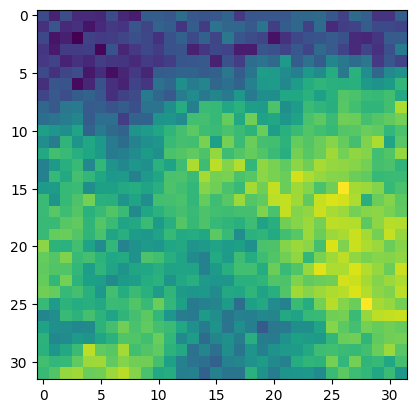

In [ ]:
plt.imshow(img_patches[1,2,3,:,:,7])

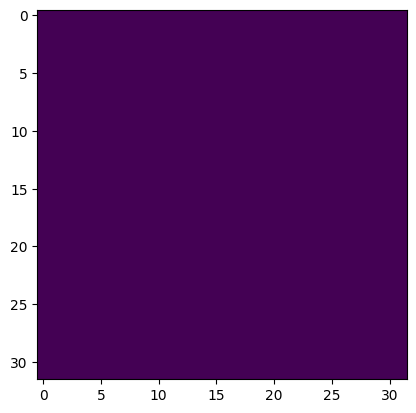

In [ ]:
plt.imshow(mask_patches[1,2,3,:,:,7])

In [ ]:
img_patches.shape

(5, 24, 32, 32, 32, 32)

In [ ]:
input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

print(input_img.shape)
print(input_mask.shape)  

(3840, 32, 32, 32)
(3840, 32, 32, 32)


In [ ]:
n_classes=2

In [ ]:
print("input_img : ", input_img.shape)

train_img = np.stack((input_img,)*1, axis=-1)
print("train_img : ", train_img.shape)

train_img = np.divide(train_img, 255) 
print("train_img/255 : ", train_img.shape)

print("input_mask : ", input_mask.shape)
train_mask = np.expand_dims(input_mask, axis=1)
print("train_mask exp dim: ", train_mask.shape)
print(np.unique(train_mask))
train_mask = np.divide(train_mask, 255)
print(np.unique(train_mask))

train_mask_cat = to_categorical(train_mask, num_classes = n_classes) #train_mask #


X_train, X_test, y_train, y_test = train_test_split(train_img, train_mask_cat, test_size = 0.05, random_state = 2)

input_img :  (3840, 32, 32, 32)
train_img :  (3840, 32, 32, 32, 1)
train_img/255 :  (3840, 32, 32, 32, 1)
input_mask :  (3840, 32, 32, 32)
train_mask exp dim:  (3840, 1, 32, 32, 32)
[  0 255]
[0. 1.]


In [ ]:
# print(X_train.shape)
# print(X_train[-1])


In [ ]:
#Evaluation metric
def dice_coefficient(y_true, y_pred):
    smoothing_factor = 1
    flat_y_true = K.flatten(y_true)
    flat_y_pred = K.flatten(y_pred)
    return (2. * K.sum(flat_y_true * flat_y_pred) + smoothing_factor) / (K.sum(flat_y_true) + K.sum(flat_y_pred) + smoothing_factor)

def dice_coefficient_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

In [ ]:
#Model Parameters
import keras
patch_size = 32
channels=1

LR = 0.0001
optim = keras.optimizers.Adam(LR)

In [ ]:
model = build_unet((patch_size,patch_size,patch_size,channels), n_classes=n_classes)

softmax


In [ ]:
model.compile(optimizer = optim, loss=dice_coefficient_loss, metrics=dice_coefficient)
print(model.summary())

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 32,  0           []                               
                                 1)]                                                              
                                                                                                  
 conv3d_23 (Conv3D)             (None, 32, 32, 32,   896         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 conv3d_25 (Conv3D)             (None, 32, 32, 32,   448         ['input_2[0][0]']                
                                16)                                                           

                                                                                                  
 max_pooling3d_9 (MaxPooling3D)  (None, 8, 8, 8, 64)  0          ['activation_27[0][0]']          
                                                                                                  
 max_pooling3d_10 (MaxPooling3D  (None, 8, 8, 8, 32)  0          ['activation_29[0][0]']          
 )                                                                                                
                                                                                                  
 conv3d_31 (Conv3D)             (None, 8, 8, 8, 128  221312      ['max_pooling3d_9[0][0]']        
                                )                                                                 
                                                                                                  
 conv3d_33 (Conv3D)             (None, 8, 8, 8, 64)  55360       ['max_pooling3d_10[0][0]']       
          

 batch_normalization_39 (BatchN  (None, 8, 8, 8, 128  512        ['conv3d_40[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_39 (Activation)     (None, 8, 8, 8, 128  0           ['batch_normalization_39[0][0]'] 
                                )                                                                 
                                                                                                  
 conv3d_transpose_4 (Conv3DTran  (None, 16, 16, 16,   65600      ['activation_39[0][0]']          
 spose)                         64)                                                               
                                                                                                  
 concatenate_6 (Concatenate)    (None, 16, 16, 16,   0           ['conv3d_transpose_4[0][0]',     
          

In [ ]:
print(model.input_shape)
print(X_train.shape)
print(model.output_shape)
print(y_train.shape)
y_train = np.squeeze(y_train,axis=1)
print(y_train.shape)
print("-------------------")
print(X_train.max())
print(X_test.max())

(None, 32, 32, 32, 1)
(3648, 32, 32, 32, 1)
(None, 32, 32, 32, 2)
(3648, 1, 32, 32, 32, 2)
(3648, 32, 32, 32, 2)
-------------------
0.9568627450980393
0.9372549019607843


In [ ]:
# tf.keras.callbacks.ModelCheckpoint(
#     filepath,
#     monitor: str = "val_loss",
#     verbose: int = 1,
#     save_best_only: bool = False,
#     save_weights_only: bool = False,
#     mode: str = "auto",
#     save_freq="epoch",
#     options=None,
#     initial_value_threshold=None,
#     **kwargs
# )

EPOCHS = 100 #too big, colab crashes
checkpoint_filepath = './checkpts/check.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=False)

In [ ]:
#Fit the model
checkpoint_filepath = './checkpts/check.h5'

history=model.fit(X_train, 
          y_train,
          batch_size=32, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks = [model_checkpoint_callback])

Epoch 1/50


2023-03-20 20:04:00.383698: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600


114/114 [==============================] - 39s 272ms/step - loss: 0.2310 - dice_coefficient: 0.7690 - val_loss: 0.8878 - val_dice_coefficient: 0.1122
Epoch 2/50
114/114 [==============================] - 31s 274ms/step - loss: 0.1080 - dice_coefficient: 0.8920 - val_loss: 0.8689 - val_dice_coefficient: 0.1311
Epoch 3/50
114/114 [==============================] - 31s 275ms/step - loss: 0.0875 - dice_coefficient: 0.9125 - val_loss: 0.3246 - val_dice_coefficient: 0.6754
Epoch 4/50
114/114 [==============================] - 31s 275ms/step - loss: 0.0713 - dice_coefficient: 0.9287 - val_loss: 0.3165 - val_dice_coefficient: 0.6835
Epoch 5/50
114/114 [==============================] - 31s 276ms/step - loss: 0.0619 - dice_coefficient: 0.9381 - val_loss: 0.0812 - val_dice_coefficient: 0.9188
Epoch 6/50
114/114 [==============================] - 31s 276ms/step - loss: 0.0552 - dice_coefficient: 0.9448 - val_loss: 0.0427 - val_dice_coefficient: 0.9573
Epoch 7/50
114/114 [=========================

In [ ]:
#Save model for future use
model.save('checkpts/savedmod50ep.h5')

In [ ]:
%ls

 checkpts/                                          testing.tif
'Copy of Trying.ipynb'                              training_groundtruth.tif
'Improved 3D-Semantic Segmentation Project.ipynb'   training.tif
 testing_groundtruth.tif


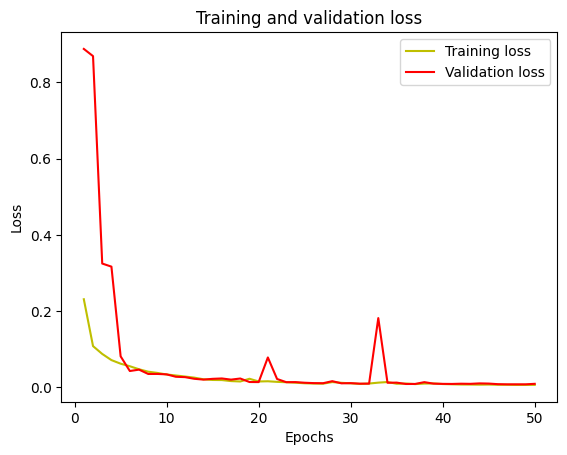

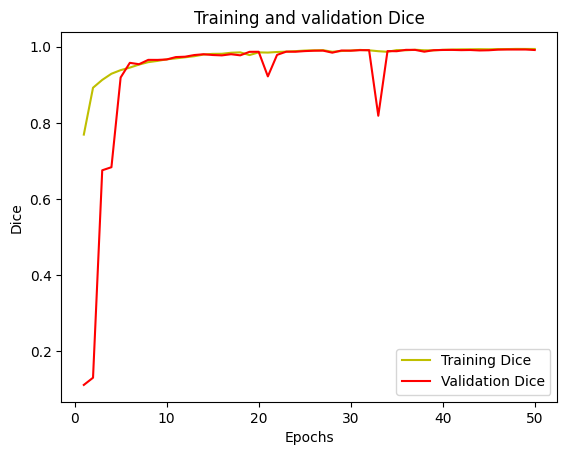

In [ ]:
#Visualisation
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['dice_coefficient']
val_acc = history.history['val_dice_coefficient']

plt.plot(epochs, acc, 'y', label='Training Dice')
plt.plot(epochs, val_acc, 'r', label='Validation Dice')
plt.title('Training and validation Dice')
plt.xlabel('Epochs')
plt.ylabel('Dice')
plt.legend()
plt.show()

In [ ]:
%ls

 checkpts/                                          testing.tif
'Copy of Trying.ipynb'                              training_groundtruth.tif
'Improved 3D-Semantic Segmentation Project.ipynb'   training.tif
 testing_groundtruth.tif


In [ ]:
#loading model
from keras.models import load_model
my_model = load_model('./checkpts/savedmod50ep.h5', compile=False)


In [ ]:

print(X_test.shape)

#Predicting on testing subdataset
y_pred=my_model.predict(X_test)
print(y_pred.shape)

# y_pred_argmax=np.argmax(y_pred, axis=4)
# print(y_pred_argmax.shape)
y_test=np.squeeze(y_test,axis=1)
print(y_test.shape)
# y_test_argmax = np.argmax(y_test, axis=4)
# print(y_test_argmax.shape)


(192, 32, 32, 32, 1)
6/6 [==============================] - 1s 111ms/step
(192, 32, 32, 32, 2)
(192, 32, 32, 32, 2)


In [ ]:
print(y_pred.shape)
print(y_test.shape)

# y_test_argmax=np.squeeze(y_test_argmax,axis=1)

# y_test_argmax = np.divide(y_test_argmax, 255)
#print(y_test_argmax.shape)
print(np.unique(y_pred))
print(np.unique(y_test))

y_test_argmax = np.argmax(y_test, axis=4)
y_pred_argmax = np.argmax(y_pred, axis=4)

print(y_pred.shape)
print(y_test.shape)
print(np.unique(y_pred))
print(np.unique(y_test))

(192, 32, 32, 32, 2)
(192, 32, 32, 32, 2)
[1.9384021e-25 1.9756085e-25 2.3625822e-25 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]
[0. 1.]
(192, 32, 32, 32, 2)
(192, 32, 32, 32, 2)
[1.9384021e-25 1.9756085e-25 2.3625822e-25 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]
[0. 1.]


In [ ]:
%ls

 checkpts/                                          testing.tif
'Copy of Trying.ipynb'                              training_groundtruth.tif
'Improved 3D-Semantic Segmentation Project.ipynb'   training.tif
 testing_groundtruth.tif


In [ ]:
#evaluation metric on testing sub-dataset
print(dice_coefficient(y_test, y_pred))

tf.Tensor(0.99093527, shape=(), dtype=float32)


In [ ]:
#visualisation on random images
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]

test_img_input=np.expand_dims(test_img, 0)


test_pred = my_model.predict(test_img_input)
test_prediction = np.argmax(test_pred, axis=4)[0,:,:,:]

ground_truth_argmax = np.argmax(ground_truth, axis=3)
print(ground_truth_argmax.shape)

1/1 [==============================] - 0s 490ms/step
(32, 32, 32)


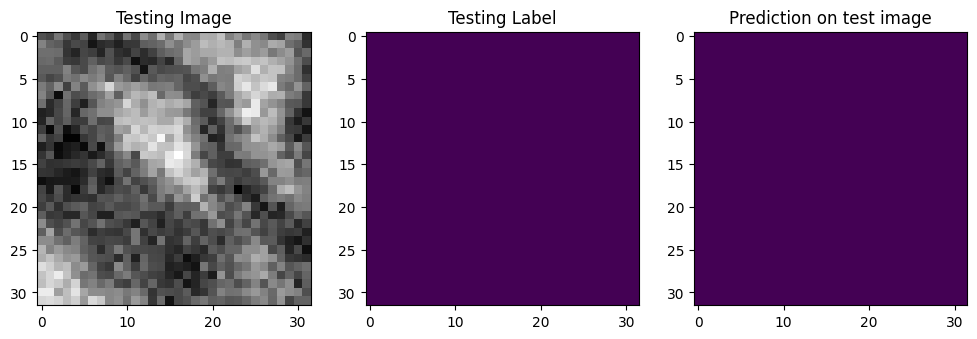

In [ ]:
#Plot individual slices from test predictions for verification
slice = random.randint(0, ground_truth_argmax.shape[2]-1)
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[slice,:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth_argmax[slice,:,:])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction[slice,:,:])
plt.show()

In [ ]:
#Final Prediction on 'testing.tif'   
large_image = io.imread('testing.tif')
patches = patchify(large_image, (32, 32, 32), step=32)
print(large_image.shape)
print(patches.shape)

(165, 768, 1024)
(5, 24, 32, 32, 32, 32)


In [ ]:
#Prediction iteratively
predicted_patches = []
for i in range(patches.shape[0]):
  for j in range(patches.shape[1]):
    for k in range(patches.shape[2]):
      #print(i,j,k)
      single_patch = patches[i,j,k, :,:,:]
      single_patch_3ch = np.stack((single_patch,), axis=-1)
      single_patch_3ch = single_patch_3ch/255.
      single_patch_3ch_input = np.expand_dims(single_patch_3ch, axis=0)
      single_patch_prediction = my_model.predict(single_patch_3ch_input)
      single_patch_prediction_argmax = np.argmax(single_patch_prediction, axis=4)[0,:,:,:]
      predicted_patches.append(single_patch_prediction_argmax)

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 14ms/step


In [ ]:
#prediction to numpy
predicted_patches = np.array(predicted_patches)
print(predicted_patches.shape)

(3840, 32, 32, 32)


In [ ]:

predicted_patches_reshaped = np.reshape(predicted_patches, 
                                        (patches.shape[0], patches.shape[1], patches.shape[2],
                                         patches.shape[3], patches.shape[4], patches.shape[5]) )
print(predicted_patches_reshaped.shape)

(5, 24, 32, 32, 32, 32)


In [ ]:
#saving the output because colab used to crash when unpatchifying the prediction
np.savetxt('data.csv',predicted_patches_reshaped.reshape(122880,1024))

In [ ]:
#new session after colab crashes
import numpy as np

In [ ]:
print(predicted_patches_reshaped.shape)

(5, 24, 32, 32, 32, 32)


In [ ]:
predicted_patches_reshaped = predicted_patches_reshaped.reshape((5,24,32,32,32,32))

In [ ]:
predicted_patches_reshaped.shape

(5, 24, 32, 32, 32, 32)

In [ ]:
#converting binary masks to black and white image prediction
predicted_patches_reshaped = np.multiply(predicted_patches_reshaped,255) 

In [ ]:
reconstructed_image = unpatchify(predicted_patches_reshaped, (160,768,1024)) #I had to cut last 5 images since during patchifying we lost some data
print(reconstructed_image.shape)

(160, 768, 1024)


In [ ]:
print(reconstructed_image.dtype)

int64


In [ ]:
np.unique(reconstructed_image)

array([  0, 255])

In [ ]:
np.count_nonzero(reconstructed_image == 255)

6348451

In [ ]:
np.count_nonzero(reconstructed_image == 0)

119480669

In [ ]:
#converting it to uint8 for opening file in other viewing formats
reconstructed_image=reconstructed_image.astype(np.uint8)
print(reconstructed_image.dtype)

uint8


In [ ]:
#exporting the results in tif
from tifffile import imsave
imsave('myresults3.tif', reconstructed_image)

/tmp/ipykernel_82629/1870997439.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('myresults3.tif', reconstructed_image)


In [ ]:
print(np.unique(reconstructed_image))

[  0 255]


Checking if what im getting even makes sense

In [ ]:
predicted_patches_reshaped_im = np.multiply(predicted_patches_reshaped,255) 

In [ ]:
image_useful_im = np.multiply(image_useful,255) 

In [ ]:
predicted_patches_reshaped_im = predicted_patches_reshaped_im.reshape((5,24,32,32,32,32))

In [ ]:
image_useful_im = image_useful_im.reshape((5,24,32,32,32,32))

In [ ]:
reconstructed_image = unpatchify(predicted_patches_reshaped_im, (160,768,1024)) #I had to cut last 5 images since during patchifying we lost some data
print(reconstructed_image.shape)

(160, 768, 1024)


In [ ]:
reconstructed_image_test = unpatchify(image_useful_im, (160,768,1024)) #I had to cut last 5 images since during patchifying we lost some data
print(reconstructed_image_test.shape)

(160, 768, 1024)


In [30]:
print(reconstructed_image.dtype)
print(np.unique(reconstructed_image))
print(np.count_nonzero(reconstructed_image == 1))
print(np.count_nonzero(reconstructed_image == 0))

uint8
[0 1]
6348451
119480669


In [ ]:
reconstructed_image=reconstructed_image.astype(np.uint8)
print(reconstructed_image.dtype)
from tifffile import imsave
imsave('myresultsJac.tif', reconstructed_image)

In [32]:
print(reconstructed_image_test.dtype)
print(np.unique(reconstructed_image_test))
print(np.count_nonzero(reconstructed_image_test == 1))
print(np.count_nonzero(reconstructed_image_test == 0))

uint8
[0 1]
6756015
119073105


In [ ]:
reconstructed_image_test=reconstructed_image_test.astype(np.uint8)
print(reconstructed_image_test.dtype)
from tifffile import imsave
imsave('myresultsJacTest.tif', reconstructed_image_test)

**BenchMarking**

In [ ]:
%ls

gdrive/  sample_data/


In [ ]:
%cd gdrive/My\ Drive/Thesis/yasho/improv

[Errno 2] No such file or directory: 'gdrive/My Drive/Thesis/yasho/improv'
/content/gdrive/.shortcut-targets-by-id/1MajC_dl3lGrSNLdcScjHbqW6wN7tGOul/yasho


In [ ]:
%ls

 checkpts/  'Data Visualization'/                               myresults3.tif
 data.csv   'Improved 3D-Semantic Segmentation Project.ipynb'


In [ ]:
#predicted_patches_reshaped = np.loadtxt("data.csv")

In [ ]:
image = io.imread('testing_groundtruth.tif') #gdrive/MyDrive/Colab Notebooks/boston/
image.shape
img_patches = patchify(image, (32, 32, 32), step=32)

In [ ]:
img_patches.shape
image_useful = np.reshape(img_patches, (160, 768, 1024))

In [ ]:
imag = io.imread('myresults3.tif') #gdrive/MyDrive/Colab Notebooks/boston/
predicted_patches_reshaped = patchify(imag, (32, 32, 32), step=32)

In [ ]:
predicted_patches_reshaped.shape
predicted_patches_reshaped = np.reshape(predicted_patches_reshaped, (160, 768, 1024))

In [ ]:
print(image_useful.shape)
print(predicted_patches_reshaped.shape)

(160, 768, 1024)
(160, 768, 1024)


In [ ]:
# image_useful = np.reshape(image_useful, (122880, 1024))
# image_useful.shape

In [ ]:
image_useful = np.divide(image_useful, 255)

In [ ]:
predicted_patches_reshaped = np.divide(predicted_patches_reshaped, 255)

In [ ]:
image_useful.shape

(160, 768, 1024)

In [ ]:
image_useful = np.reshape(image_useful, (122880, 1024))

In [ ]:
print(np.unique(predicted_patches_reshaped))
print(np.unique(image_useful))

[0. 1.]
[0. 1.]


In [ ]:
true_labels = image_useful
pred_labels = predicted_patches_reshaped
pred_labels = np.reshape(pred_labels,(-1,1024))

In [ ]:
# True Positive (TP): we predict a label of 1 (positive), and the true
TP = np.sum(np.logical_and(pred_labels == 1, true_labels == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(pred_labels == 0, true_labels == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(pred_labels == 1, true_labels == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(pred_labels == 0, true_labels == 1))

In [ ]:
print("tp: ", TP)
print("tn: ", TN)
print("fp: ", FP)
print("fn: ", FN)

tp:  5797611
tn:  118522265
fp:  550840
fn:  958404


In [ ]:
def jaccardCoeff(tp, fn, fp):
  coeff = tp/(tp+fn+fp)
  return coeff

In [ ]:
jaccardCoeff(TP, FN, FP)

0.7934482071972141